In [60]:
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import pandas as pd
%matplotlib inline

target_db = 'dft-mot-results-and-test-items-2005-to-2020.sqlite'
con = sqlite3.connect(target_db)
df = pd.read_sql_query("""
    SELECT make, count(*) AS count
    FROM tests
    WHERE test_class_id=4
    GROUP BY make
    ORDER BY count DESC
    LIMIT 30
""", con)
df.set_index(['make'],inplace=True)

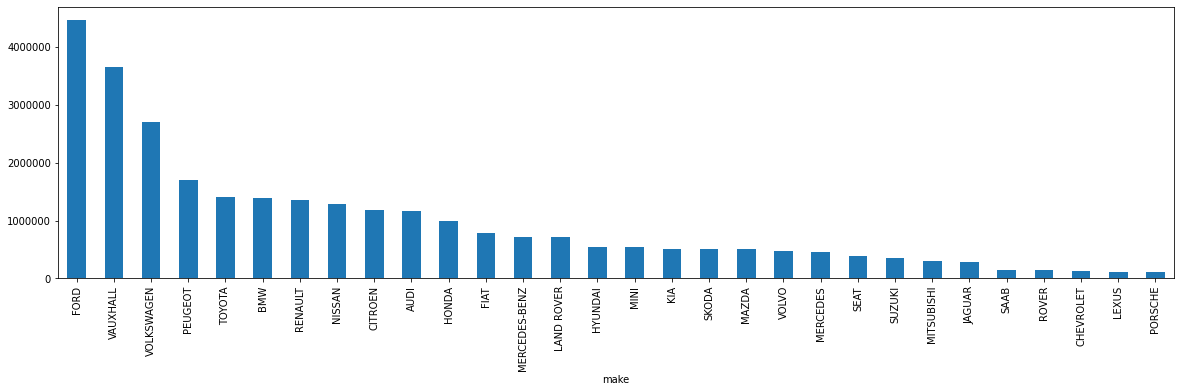

In [61]:
df.plot(kind='bar', figsize=(20,5), legend=None)
ax = plt.gca()
ax.yaxis.get_major_formatter().set_scientific(False)
plt.show()